In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import pylab
from collections import Counter

## Importing the Dataset

In [30]:
df = pd.read_csv("Position_Salaries.csv")
df.head()

# each row represents a position, data set is non-linear

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [31]:
len(df)

10

In [32]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

We are going to skip splitting the dataset into train and test set, because we want to leverage the maximum data in order to make our future prediction of the salary for the position level. For example between six and seven i.e. 6.5 (because a person might have worked in 2 positions before)

## Create matrix of features and label

In [33]:
# Position and level are redundant features (features that have the same meaning). Its like we have already done some label encoding already.

X = df.iloc[:, 1:-1].values # so we will take only one of the redundant columns
y = df.iloc[:, -1].values # label

We will train a linear regression model just for comparison with a polynomial regression model.

And each time, we will see that for this dataset, polynomial regression (a non-linear regression model) is much better than linear regression

## Training the Linear Regression Model on the whole dataset (for comparison)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # matrix of single feature X -- Simple Linear (Since only 1 feature is present)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression Model on the whole dataset 

### Create a matrix of powered features --> x1,x1^2,...,x1^n

In [35]:
# inside the parenthesis, choose n power
# n can be 2,3,4 ... (higher degree may lead to overfitting)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X) # transformation

# model will now contain x1,x1^2,x1^3,x1^4 --- matrix of squared features X_poly

In [36]:
# now build a linear regression model that will integrate the matrix of squared features

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualize the Linear Regression results

<function matplotlib.pyplot.show>

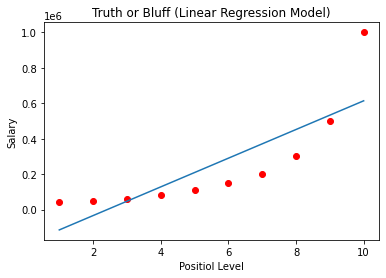

In [37]:
y_pred = lin_reg.predict(X) # simple model and X

plt.scatter(X, y, color = 'red') # plot the real data points
plt.plot(X, y_pred) # plot the regression line (hypothesis line) - using predicted salaries 

plt.title("Truth or Bluff (Linear Regression Model)")
plt.xlabel("Positiol Level")
plt.ylabel("Salary")
plt.show

## Visualize the Polynomial Regression results

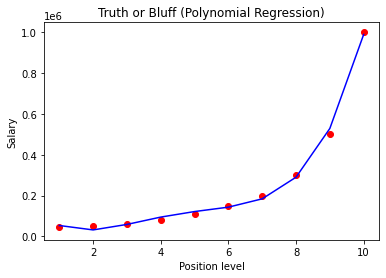

In [39]:
y_pred = lin_reg_2.predict(X_poly)

plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predict a new result with Linear Regression

In [40]:
# e.g predict for a single feature 6.5
lin_reg.predict([[6.5]])

# bad prediction - too much high salary prediction

array([330378.78787879])

## Predict a new result with Linear Regression

In [43]:
# input - 6.5 for X1, for (6.5)^2 for X2, (6.5)^3 for X3, ......

input_pred = poly_reg.fit_transform([[6.5]])

lin_reg_2.predict(input_pred)

# good prediction using a non-linear regression model

array([158862.45265155])